# 3. Cerebral Stroke 
# IMBALANCE PROPERTIES: EXTREME

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
%matplotlib inline

# Contents
1. [Exploratory Data Analysis](#EDA)
2. [Feature Importance](#FI)
3. [Feature Normalization](#FE)
4. [Sampling Techniques](#ST)
5. [Modelling](#Mo)
6. [Model Evaluation](#MOE)
7. [Results](#RS)
    1. [Support Vector Machine (SVM)](#SVM)
    2. [Decision Tree (DT)](#DT)
    3. [Gaussian Naïve Bayes (GNB)](#GNB)
    4. [K-Nearest Neighbourhood (KNN)](#KNN)
    5. [Logistic Regression (LR)](#LR)

<a id="EDA"></a>
# 1. Exploratory Data Analysis

In [2]:
path = '/Users/ominguet/Desktop/ClassImbalance_MedicalDatasets/data/external/'

In [3]:
data = pd.read_csv(path+'cerebralstroke.csv', sep=',', encoding='utf-8')
data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
data.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5894,Male,58.00,0,1,Yes,Private,Rural,240.59,31.4,smokes,1
33086,Female,78.00,0,0,Yes,Self-employed,Urban,92.62,33.6,formerly smoked,0
27145,Male,1.88,0,0,No,children,Rural,83.81,14.2,NaN,0
6187,Male,47.00,0,0,Yes,Govt_job,Urban,128.20,29.3,smokes,0
4350,Female,51.00,0,0,Yes,Self-employed,Rural,76.35,33.5,formerly smoked,0


In [5]:
data.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [6]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
#Descriptive or summary statistics of numeric columns
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [8]:
#Concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [9]:
cat_cols = data.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    data[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column         value                  
Residence_type Rural             21644
               Urban             21756
ever_married   No                15462
               Yes               27938
gender         Other                11
               Male              17724
               Female            25665
smoking_status smokes             6562
               formerly smoked    7493
               never smoked      16053
work_type      Never_worked        177
               Govt_job           5440
               children           6156
               Self-employed      6793
               Private           24834

Smoking Status

In [10]:
data['smoking_status'] = data['smoking_status'].fillna('unknown')

In [11]:
smoking_status_mapper = {
    "smokes": 1,
    "formerly smoked": 2,
    "never smoked": 3,
    "unknown": 4,
}
data['smoking_status'] = data['smoking_status'].replace(smoking_status_mapper)

In [12]:
data['smoking_status'].value_counts()

3    16053
4    13292
2     7493
1     6562
Name: smoking_status, dtype: int64

Gender

In [13]:
gender_mapper = {
    "Female": 1,
    "Male": 2,
    "Other": 3
}
data['gender'] = data['gender'].replace(gender_mapper)

In [14]:
data['gender'].value_counts()

1    25665
2    17724
3       11
Name: gender, dtype: int64

Ever Married

In [15]:
ever_married_mapper = {
    "No": 1,
    "Yes": 2
}
data['ever_married'] = data['ever_married'].replace(ever_married_mapper)

In [16]:
data['ever_married'].value_counts()

2    27938
1    15462
Name: ever_married, dtype: int64

Work Type

In [17]:
work_type_mapper = {
    "Private": 1,
    "Self-employed": 2,
    "children": 3,
    "Govt_job": 4,
    "Never_worked": 5
}
data['work_type'] = data['work_type'].replace(work_type_mapper)

In [18]:
data['work_type'].value_counts()

1    24834
2     6793
3     6156
4     5440
5      177
Name: work_type, dtype: int64

Residence Type

In [19]:
Residence_type_mapper = {
    "Urban": 1,
    "Rural": 2
}
data['Residence_type'] = data['Residence_type'].replace(Residence_type_mapper)

In [20]:
data['Residence_type'].value_counts()

1    21756
2    21644
Name: Residence_type, dtype: int64

BMI

In [21]:
data['bmi'].isna().sum()

1462

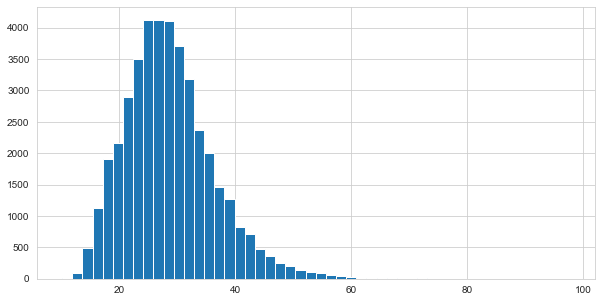

In [22]:
data['bmi'].hist(figsize=[10,5], bins=50);

In [23]:
data['bmi'].fillna(data['bmi'].mode()[0], inplace=True)

In [24]:
data['bmi'].isna().sum()

0

In [25]:
#Returns the dimensions of the array
#Rows & Columns
data.shape

(43400, 11)

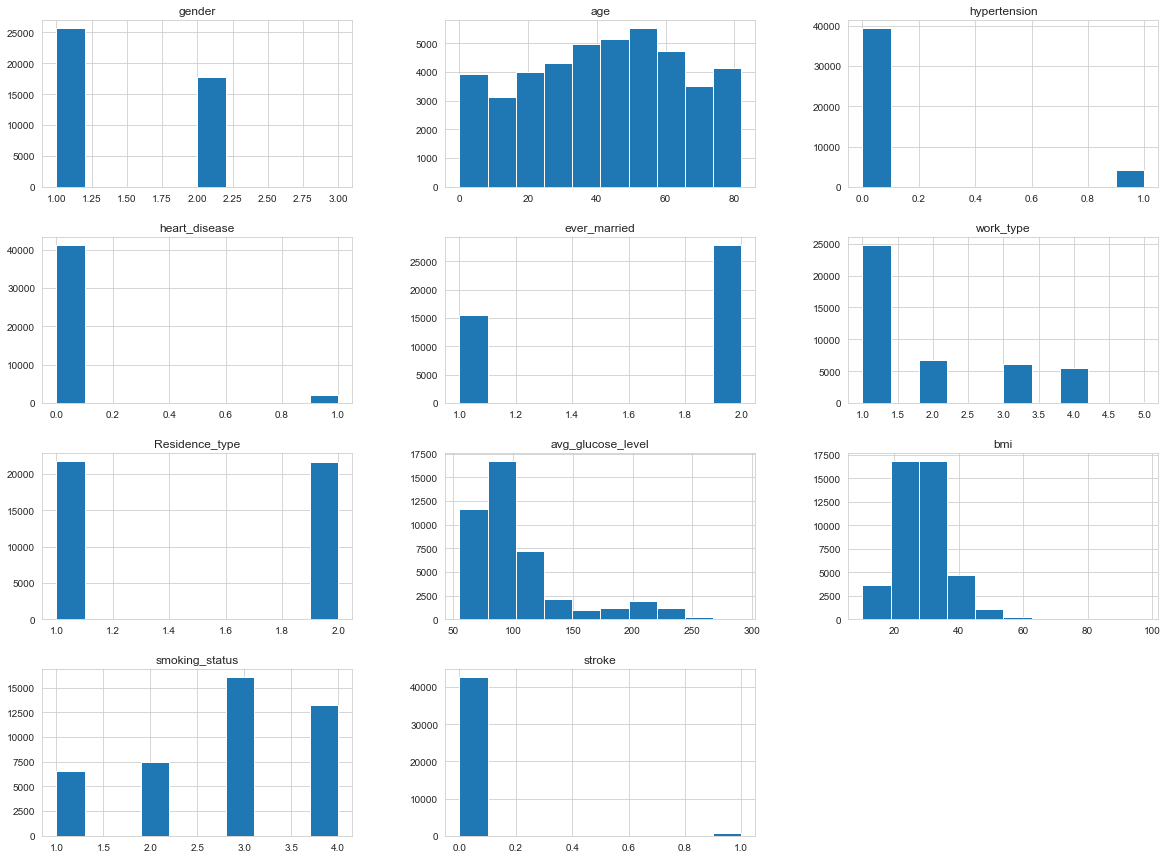

In [26]:
#Representation of the distribution of data
data.hist(figsize=[20,15]);

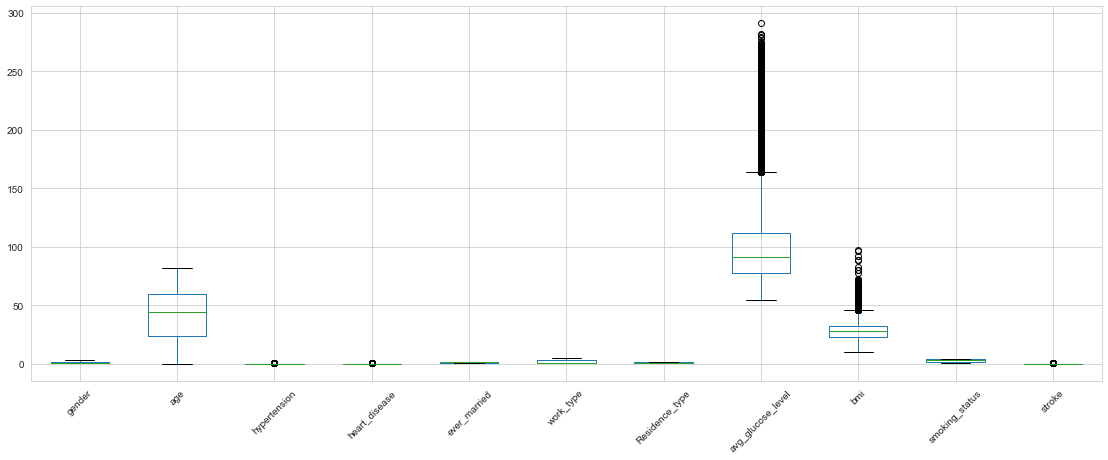

In [27]:
plt.rcParams["figure.figsize"] = [15.50, 6.50]
plt.rcParams["figure.autolayout"] = True
data.boxplot(widths = 0.6, rot=45);

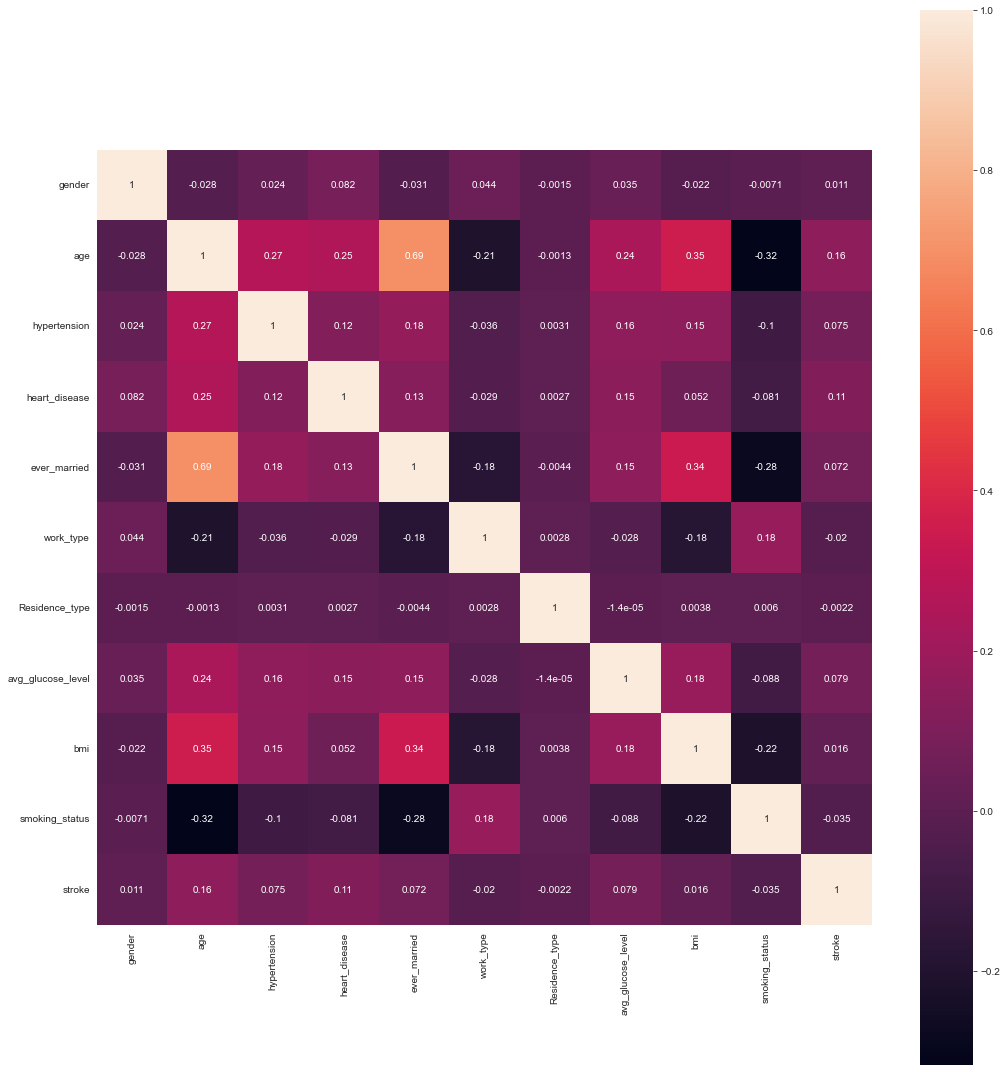

In [28]:
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corrMatrix, square=True, annot=True, ax=ax)
plt.show()

In [29]:
#Percentage of NAN Values
data.isna().mean().round(4) * 100

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [30]:
#Number of NAN Values
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Label

In [31]:
data['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [32]:
print('Percentage of Imbalance Property: {:.2f}%'.format((data['stroke'].value_counts()[1] * 100 / data['stroke'].value_counts()[0])))

Percentage of Imbalance Property: 1.84%


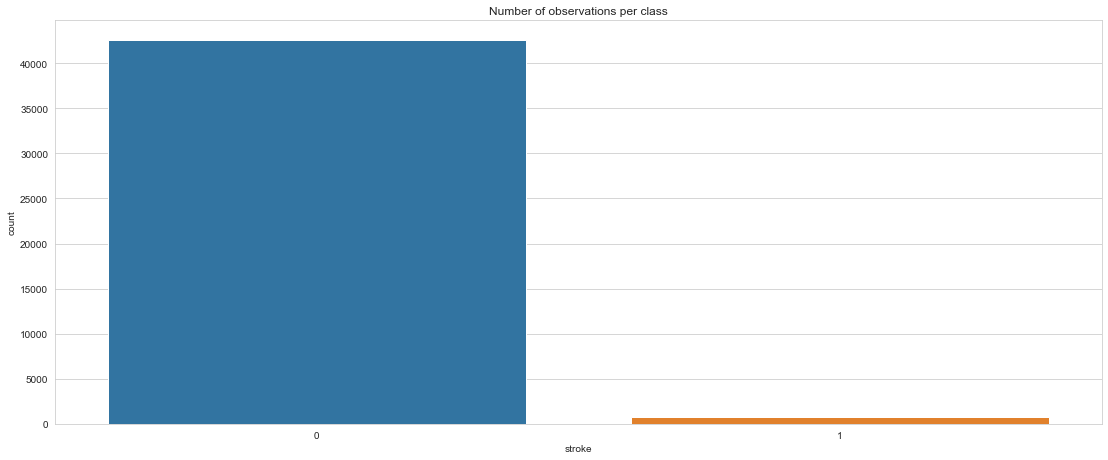

In [33]:
ax = sns.countplot(x = data['stroke'])
ax.set_title('Number of observations per class')
plt.show();

---

<a id="FI"></a>
# 2. Feature Importance

## Diabetes classification with LightGBM - SHAP

In [34]:
# !conda install lightgbm -y -U
# !pip install shap

In [35]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb # Light GBM is a gradient boosting framework that uses tree based learning algorithm
import shap

# print the JS visualization code to the notebook
shap.initjs()

### Load dataset

In [36]:
X = data.drop('stroke', axis=1)
y = data['stroke']

# create a train/test split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.2,random_state=7)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(34720, 10) (34720,)
(8680, 10) (8680,)


In [37]:
d_train = lgb.Dataset(train_x, label=train_y)
d_test = lgb.Dataset(test_x, label=test_y)

### Train the model

In [38]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	valid_0's binary_logloss: 0.0713205


### Explain predictions

In [39]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


#### SHAP Summary Plot

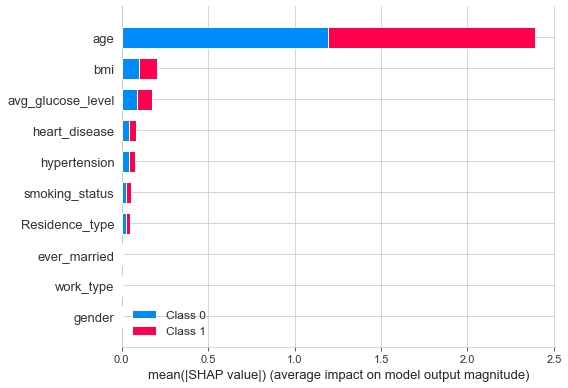

In [40]:
shap.summary_plot(shap_values, X)

---

<a id="FE"></a>
# 3. Feature Normalization

In [41]:
from sklearn.preprocessing import RobustScaler

In [42]:
# separate the columns into target and predictors 
X = data.drop('stroke', axis=1).values
y = data['stroke']

In [43]:
# split the dataset into a training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=13)
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (34720, 10) (34720,)
Test: (8680, 10) (8680,)


In [44]:
# perform a robust scaler transform of the dataset
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

---

<a id="ST"></a>
# 4. Sampling Techniques

In [45]:
from collections import Counter
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss, InstanceHardnessThreshold, TomekLinks, CondensedNearestNeighbour, AllKNN
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, OneSidedSelection, NeighbourhoodCleaningRule
from imblearn.combine import SMOTEENN, SMOTETomek 
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier

In [46]:
def evaluate_classificationmodel(X_train, X_test, y_train, y_test, model):
    """  
    Evaluation of a trained binary probabilistic classification model
   
    Args:
        X_train, X_test, y_train, y_test
        model: binary classification supervised model
    
    Return: dict
        results: {
            accuracy
            precision, recall, fscore 
            n_occurrences
            predictions_count
            tp - true positive
            tn - true negative
            fp - false positive
            fn - false negative
            auc - area under the curve
            }
    """
    # model fitting
    model.fit(X_train, y_train)
    # prediction for the evaluation set
    predictions = model.predict(X_test)
    # accuracy
    accuracy = metrics.accuracy_score(y_test, predictions)   
    # precision, recall and f1 score
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    # confusion matrix
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()    
    # fpr and tpr values for various thresholds 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label = 1) 
    # area under the curve
    auc_ = metrics.auc(fpr, tpr)    
    # gather results
    result = {'accuracy': accuracy,
              'precision':precision,
              'recall':recall,
              'fscore':fscore, 
              'n_occurences':support,
              'predictions_count': Counter(predictions),
              'tp':tp, 
              'tn':tn, 
              'fp':fp,
              'fn':fn, 
              'auc':auc_}
    
    return result

In [47]:
def resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model):
    """    
    Args:
        X_train, X_test, y_train, y_test: test and train split data samples
        model: a trained binary probabilistic classification model
    
    Return: dict
        results: OverSampling, UnderSampling and Hybrid techniques
    """
   
    results = {'ordinary':{},
               'class_weight':{},
               'oversample':{},
               'undersample':{},
               'hybrid':{}}
    
    # ------- Ordinary ----------
    results['ordinary'] = evaluate_classificationmodel(X_train, X_test, y_train, y_test, model)
    
    # ------- Class weight -------
    if 'class_weight' in model.get_params().keys():
        model.set_params(class_weight='balanced')
        results['class_weight'] = evaluate_classificationmodel(X_train, X_test, y_train, y_test, model)
        
    # ------ OverSampling techniques -----
    print('   Oversampling methods:')
    techniques = [RandomOverSampler(), SMOTE(), SMOTENC(categorical_features=[1,2]), BorderlineSMOTE(), SVMSMOTE(), 
                  KMeansSMOTE(cluster_balance_threshold=0.01), ADASYN()]
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique:{technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
        results['oversample'][technique] = evaluate_classificationmodel(X_resampled, X_test, y_resampled, y_test, model)
        
    # ------ UnderSampling techniques --------
    print('   Undersampling methods:')
    techniques = [RandomUnderSampler(), ClusterCentroids(), NearMiss(), InstanceHardnessThreshold(), TomekLinks(), CondensedNearestNeighbour(), AllKNN(),
                  EditedNearestNeighbours(), RepeatedEditedNearestNeighbours(), OneSidedSelection(), NeighbourhoodCleaningRule()]
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique:{technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
        results['undersample'][technique] = evaluate_classificationmodel(X_resampled, X_test, y_resampled, y_test, model)
        
    # ------ Hybrid techniques --------
    print(   'Hybrid methods:')
    techniques = [SMOTEENN(), SMOTETomek()]
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique:{technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
        results['hybrid'][technique] = evaluate_classificationmodel(X_resampled, X_test, y_resampled, y_test, model)
        
    # # ------ Ensemble techniques --------
    # print('-------- Ensemble methods ---------')
    # techniques = [EasyEnsembleClassifier(), RUSBoostClassifier(), BalancedBaggingClassifier(), BalancedRandomForestClassifier()]
    # for sampler in techniques:
    #     technique = sampler.__class__.__name__
    #     print(f'Technique:{technique}')
    #     print(f'Before resampling: {sorted(Counter(y_train).items())}')
    #     X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    #     print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
    #     results['ensemble'][technique] = evaluate_model(X_resampled, X_test, y_resampled, y_test, model)
    
    return results

---

<a id="Mo"></a>
# 5. Modelling

In [48]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

---

<a id="MOE"></a>
# 6. Model Evaluation

In [56]:
def evaluate_resamplingmethod(results, method, metrics = ['precision', 'recall', 'fscore']):
    """
    Evaluation of resampling techniques pipeline of the trained binary probabilistic classification model    
    
    Args:
        results: Model evaluation outputs
        method: oversample, undersample, hybrid
        metrics: precision, recall, fscore
    
    Return:
        None
    """
    
    fig, ax = plt.subplots(1, 3, sharey = True, figsize=(20,6)) 
    
    for i, metric in enumerate(metrics):
        ax[i].axhline(results['ordinary'][metric][0], label = 'No Resampling')
        if results['class_weight']:
            ax[i].bar(0, results['class_weight'][metric][0], label = 'Adjust Class Weight')
        ax[0].legend()
        for j, (technique, result) in enumerate(results[method].items()):
            ax[i].bar(j+1, result[metric][0], label = technique)
        ax[i].set_title(f'Cerebral Stroke:\n{metric}')

In [57]:
def metrics_dataframe(results):
    """
    Creates a dataframe from the results obtained in the evaluation of the models
    
    Args:
        results: Model evaluation outputs
    
    Return:
        df
    """
    
    # ordinary results
    ordinary = results.get('ordinary', {})
    df_ordinary = pd.DataFrame.from_dict(ordinary, orient='index').T
    df_ordinary.insert(0, 'method','ordinary')
    
    #class weight results
    class_weight = results.get('class_weight',{})
    df_classweight = pd.DataFrame.from_dict(class_weight, orient='index').T
    df_classweight.insert(0, 'method','class_weight')
    
    # sampling techniques results
    sampling = pd.concat({k: pd.DataFrame.from_dict(v, 'index') for k, v in results.items()}, axis=0)
    sampling = sampling.drop(0, axis=1)
    sampling = sampling.dropna(how='all')
    sampling = sampling.droplevel(0, axis=0)
    sampling.index.name = 'method'
    sampling = sampling.reset_index()
    
    #concat dataframes
    output = pd.concat([df_ordinary, df_classweight], ignore_index=True)
    results = pd.concat([output, sampling], ignore_index=True)
    
    return results

---

<a id="RS"></a>
# 7. Results

<a id="SVM"></a>
## Support Vector Machine (SVM)

In [ ]:
%%time
model_svc = SVC()
results_svc = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_svc)

In [ ]:
evaluate_resamplingmethod(results_svc, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_svc, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_svc, 'hybrid')

In [ ]:
svc = metrics_dataframe(results_svc)
svc.to_html('svc_results_stroke.html')

<a id="DT"></a>

## Decision Tree (DT)

In [ ]:
%%time
model_tree = DecisionTreeClassifier()
results_tree = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_tree)

In [ ]:
evaluate_resamplingmethod(results_tree, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_tree, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_tree, 'hybrid')

In [ ]:
tree = metrics_dataframe(results_tree)
tree.to_html('tree_results_stroke.html')

<a id="GNB"></a>
## Gaussian Naïve Bayes (GNB)

In [ ]:
%%time
model_gnb = GaussianNB()
results_gnb = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_gnb)

In [ ]:
evaluate_resamplingmethod(results_gnb, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_gnb, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_gnb, 'hybrid')

In [ ]:
gnb = metrics_dataframe(results_gnb)
gnb.to_html('gnb_results_stroke.html')

<a id="KNN"></a>
## K-Nearest Neighbourhood (KNN)

In [ ]:
%%time
model_knn = KNeighborsClassifier()
results_knn = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_knn)

In [ ]:
evaluate_resamplingmethod(results_knn, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_knn, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_knn, 'hybrid')

In [ ]:
knn = metrics_dataframe(results_knn)
knn.to_html('knn_results_stroke.html')

<a id="LR"></a>
## Logistic Regression (LR)

In [51]:
%%time
model_lr = LogisticRegression()
results_lr = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_lr)

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


   Oversampling methods:
Technique:RandomOverSampler
Before resampling: [(0, 34094), (1, 626)]
After resampling: [(0, 34094), (1, 34094)]
Technique:SMOTE
Before resampling: [(0, 34094), (1, 626)]
After resampling: [(0, 34094), (1, 34094)]
Technique:SMOTENC
Before resampling: [(0, 34094), (1, 626)]
After resampling: [(0, 34094), (1, 34094)]
Technique:BorderlineSMOTE
Before resampling: [(0, 34094), (1, 626)]
After resampling: [(0, 34094), (1, 34094)]
Technique:SVMSMOTE
Before resampling: [(0, 34094), (1, 626)]
After resampling: [(0, 34094), (1, 16653)]
Technique:KMeansSMOTE
Before resampling: [(0, 34094), (1, 626)]
After resampling: [(0, 34094), (1, 34095)]
Technique:ADASYN
Before resampling: [(0, 34094), (1, 626)]
After resampling: [(0, 34094), (1, 33988)]
   Undersampling methods:
Technique:RandomUnderSampler
Before resampling: [(0, 34094), (1, 626)]
After resampling: [(0, 626), (1, 626)]
Technique:ClusterCentroids
Before resampling: [(0, 34094), (1, 626)]
After resampling: [(0, 626), 

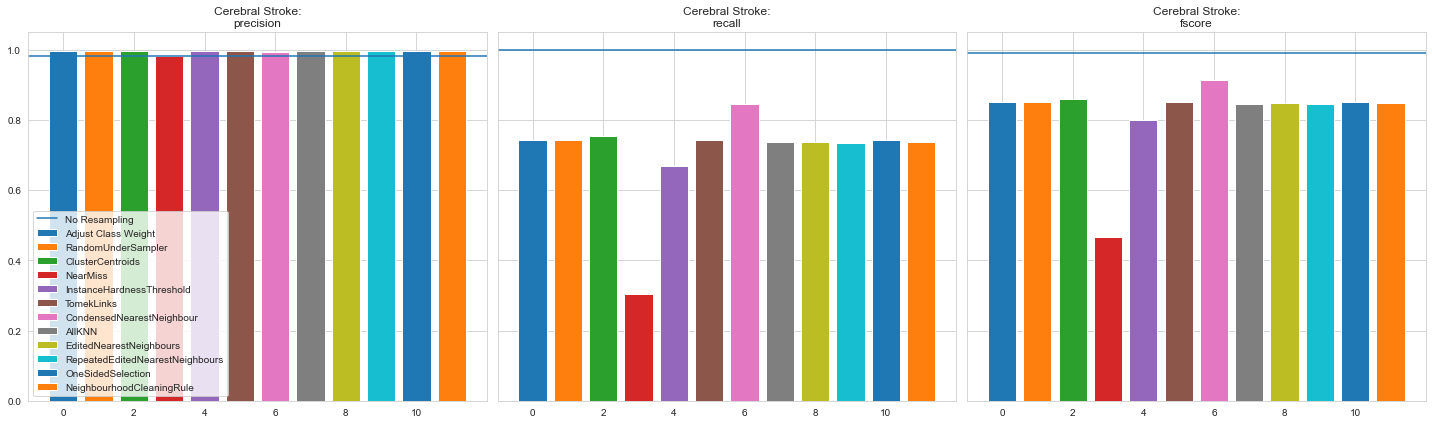

In [58]:
evaluate_resamplingmethod(results_lr, 'undersample')

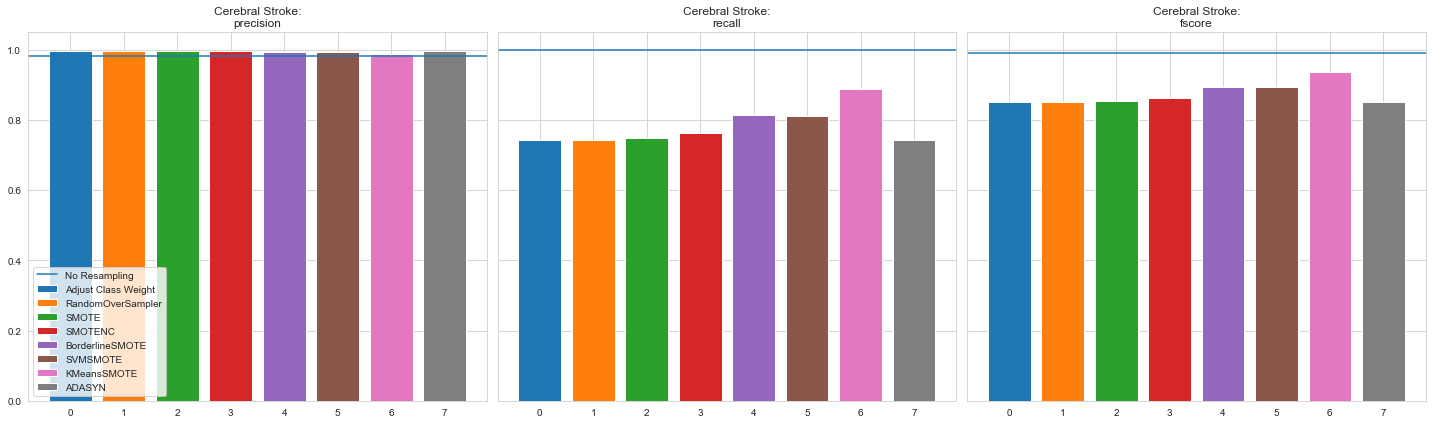

In [59]:
evaluate_resamplingmethod(results_lr, 'oversample')

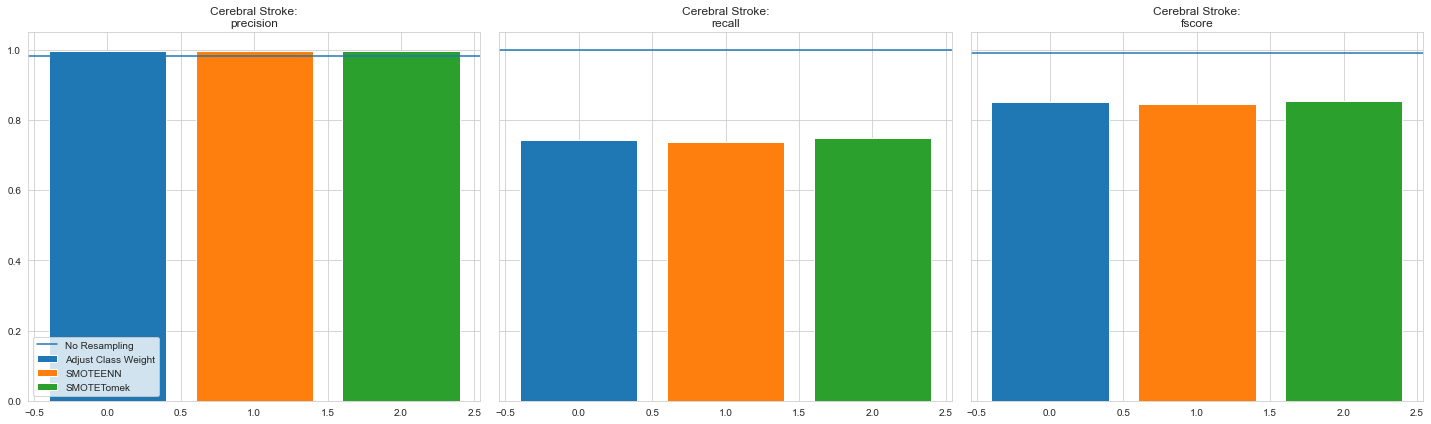

In [60]:
evaluate_resamplingmethod(results_lr, 'hybrid')

In [55]:
lr = metrics_dataframe(results_lr)
lr.to_html('lr_results_stroke.html')